In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [4]:
# Step 1: Load the dataset
file_path = "retail_sales_dataset.csv"  # Update the file path as needed
data = pd.read_csv(file_path)

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Aggregate sales by date
sales_data = data.groupby('Date')['Total Amount'].sum().reset_index()

# Set 'Date' as the index for time series analysis
sales_data.set_index('Date', inplace=True)
sales_data.sort_index(inplace=True)

In [5]:
# Step 2: Split the data into training and testing sets
train_size = int(len(sales_data) * 0.8)  # 80% train, 20% test
train, test = sales_data[:train_size], sales_data[train_size:]

In [6]:
# Step 3: Fit the ARIMA model
# Using (p=2, d=1, q=2) as a starting point
model = ARIMA(train, order=(2, 1, 2))
model_fit = model.fit()

C:\Users\Habibullah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Habibullah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Habibullah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Habibullah\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starti

In [7]:
# Step 4: Forecast on the test set
forecast = model_fit.forecast(steps=len(test))

C:\Users\Habibullah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [8]:
# Step 5: Evaluate the model
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)

# Print evaluation metrics
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 979.26
MAE: 781.44


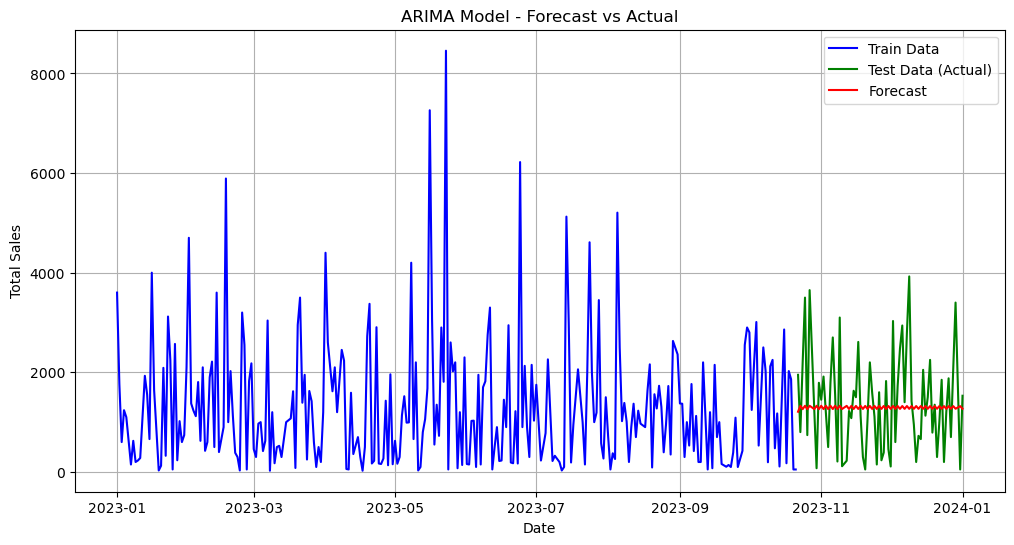

In [9]:
# Step 6: Visualize the forecast
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train Data', color='blue')
plt.plot(test, label='Test Data (Actual)', color='green')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Model - Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid()
plt.show()

C:\Users\Habibullah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


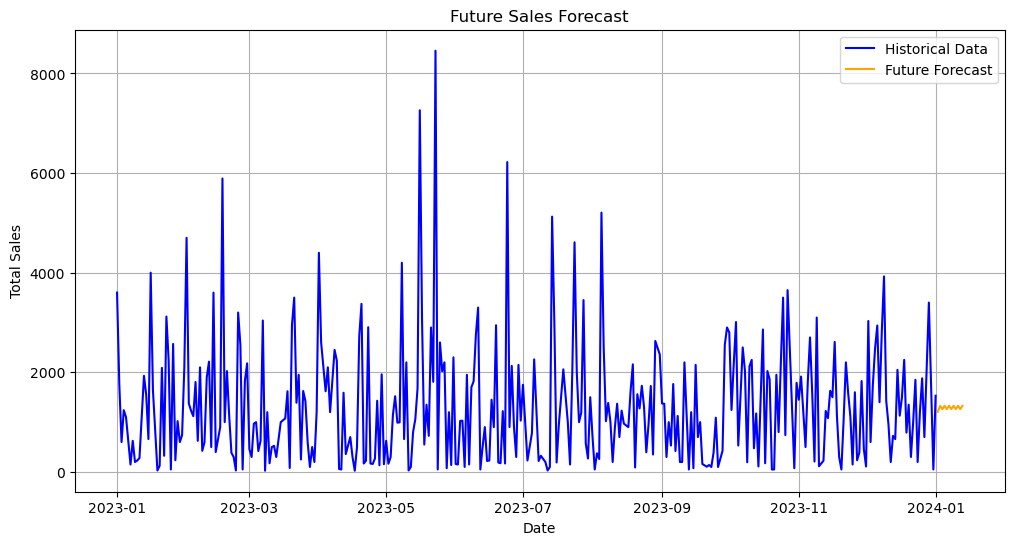

In [10]:
# Step 7: Predict future sales (optional)
future_steps = 12  # Number of future periods to forecast
future_forecast = model_fit.forecast(steps=future_steps)

# Visualize future forecasts
plt.figure(figsize=(12, 6))
plt.plot(sales_data, label='Historical Data', color='blue')
plt.plot(pd.date_range(sales_data.index[-1], periods=future_steps + 1, freq='D')[1:], 
         future_forecast, label='Future Forecast', color='orange')
plt.title('Future Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid()
plt.show()